In [2]:
import pandas as pd

# ett.csvファイルを読み込む
df = pd.read_csv('ett.csv')

# dateとOT列のみを抽出
df_filtered = df[['date', 'OT']]

# 新しいCSVファイルとして出力
df_filtered.to_csv('filtered_ett.csv', index=False)

In [3]:
import pandas as pd

# filtered_ett.csvファイルを読み込む
df_filtered = pd.read_csv('filtered_ett.csv')

# 各カラムの統計値を表示
print(df_filtered.describe())

                 OT
count  17420.000000
mean      13.324672
std        8.566946
min       -4.080000
25%        6.964000
50%       11.396000
75%       18.079000
max       46.007000


In [4]:
import pandas as pd

# filtered_ett.csvファイルを読み込む
df_filtered = pd.read_csv('filtered_ett.csv')

# OTカラムに欠損値があるかどうかを確認
missing_values = df_filtered['OT'].isnull().sum()

if missing_values > 0:
    print(f"OTカラムには {missing_values} 個の欠損値があります。")
else:
    print("OTカラムには欠損値がありません。")
    

OTカラムには欠損値がありません。


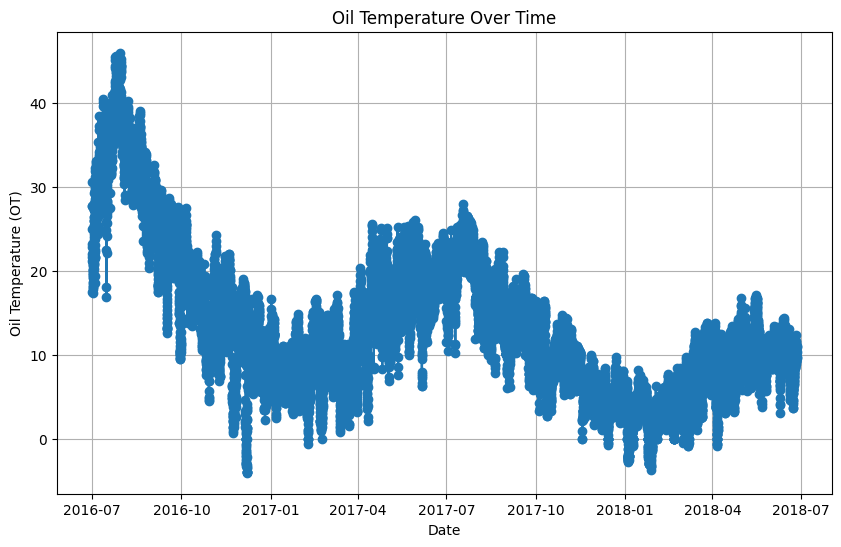

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# filtered_ett.csvファイルを読み込む
df_filtered = pd.read_csv('filtered_ett.csv')

# dateをdatetime型に変換
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# dateを横軸、OTを縦軸にプロット
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['date'], df_filtered['OT'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Oil Temperature Over Time')
plt.grid(True)
plt.show()

In [8]:
import pandas as pd

# filtered_ett.csvファイルを読み込む
df_filtered = pd.read_csv('filtered_ett.csv')

# IQRを計算
Q1 = df_filtered['OT'].quantile(0.25)
Q3 = df_filtered['OT'].quantile(0.75)
IQR = Q3 - Q1

# 異常値の閾値を設定
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 異常値を検出
outliers = df_filtered[(df_filtered['OT'] < lower_bound) | (df_filtered['OT'] > upper_bound)]

# 異常値を表示
print("異常値:")
print(outliers)

異常値:
                     date         OT
157   2016-07-07 13:00:00  35.384998
158   2016-07-07 14:00:00  37.284000
159   2016-07-07 15:00:00  38.480000
160   2016-07-07 16:00:00  36.791000
256   2016-07-11 16:00:00  34.821999
...                   ...        ...
1201  2016-08-20 01:00:00  34.891998
1202  2016-08-20 02:00:00  35.033001
1209  2016-08-20 09:00:00  35.384998
1210  2016-08-20 10:00:00  36.299000
1211  2016-08-20 11:00:00  35.666000

[471 rows x 2 columns]


In [ ]:
import pandas as pd

# ett.csvファイルを読み込む
df = pd.read_csv('ett.csv')

# 各カラムの欠損値の数を表示
missing_values = df.isnull().sum()

# 各カラムに欠損値があるかどうかを判定
for column, count in missing_values.items():
    if count > 0:
        print(f"{column} カラムには {count} 個の欠損値があります。")
    else:
        print(f"{column} カラムには欠損値がありません。")

In [9]:
import pandas as pd

# ett.csvファイルを読み込む
df = pd.read_csv('ett.csv')

# 各カラムの欠損値の数を表示
missing_values = df.isnull().sum()

# 各カラムに欠損値があるかどうかを判定
for column, count in missing_values.items():
    if count > 0:
        print(f"{column} カラムには {count} 個の欠損値があります。")
    else:
        print(f"{column} カラムには欠損値がありません。")

date カラムには欠損値がありません。
HUFL カラムには欠損値がありません。
HULL カラムには欠損値がありません。
MUFL カラムには欠損値がありません。
MULL カラムには欠損値がありません。
LUFL カラムには欠損値がありません。
LULL カラムには欠損値がありません。
OT カラムには欠損値がありません。


In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ett.csvファイルを読み込む
df = pd.read_csv('ett.csv')

# 正規化するカラムを指定
columns_to_normalize = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']

# Min-Maxスケーラーを初期化
scaler = MinMaxScaler()

# 指定したカラムを正規化
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# 正規化されたデータを確認
print(df.head())

# 正規化されたデータを新しいCSVファイルとして保存
df.to_csv('normalized_ett.csv', index=False)

                  date      HUFL      HULL      MUFL      MULL      LUFL  \
0  2016-07-01 00:00:00  0.615599  0.454943  0.628980  0.467510  0.556576   
1  2016-07-01 01:00:00  0.612708  0.459449  0.626458  0.464878  0.550279   
2  2016-07-01 02:00:00  0.601143  0.436920  0.621438  0.459689  0.512595   
3  2016-07-01 03:00:00  0.599698  0.450437  0.621438  0.462320  0.515693   
4  2016-07-01 04:00:00  0.605480  0.450437  0.626458  0.467510  0.521990   

       LULL         OT  
0  0.613765  30.531000  
1  0.620783  27.787001  
2  0.586144  27.787001  
3  0.599955  25.044001  
4  0.599955  21.948000  


In [15]:
import pandas as pd

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 時間(hour)ごとにグループ化し、OTの平均値を計算
df['hour'] = df['date'].dt.hour
hourly_avg = df.groupby('hour')['OT'].mean()

# 結果を表示
print(hourly_avg)

hour
0     12.873026
1     12.771275
2     12.715167
3     12.592219
4     12.486318
5     12.369146
6     12.326700
7     12.478167
8     12.739401
9     12.820499
10    13.167296
11    13.420955
12    13.578715
13    14.017368
14    14.611333
15    14.643438
16    14.714331
17    14.594492
18    14.203512
19    13.769286
20    13.473437
21    13.292393
22    13.159637
23    12.973457
Name: OT, dtype: float64


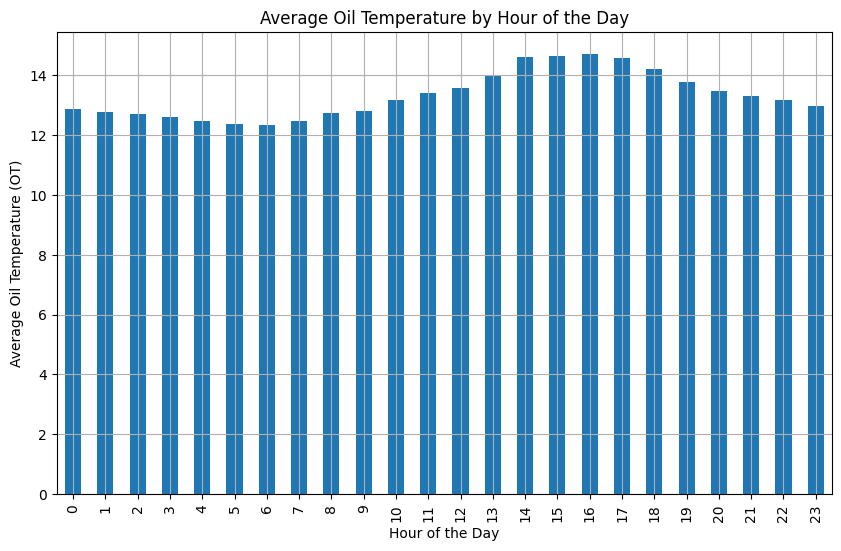

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 時間(hour)ごとにグループ化し、OTの平均値を計算
df['hour'] = df['date'].dt.hour
hourly_avg = df.groupby('hour')['OT'].mean()

# グラフにプロット
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Oil Temperature (OT)')
plt.title('Average Oil Temperature by Hour of the Day')
plt.grid(True)
plt.show()

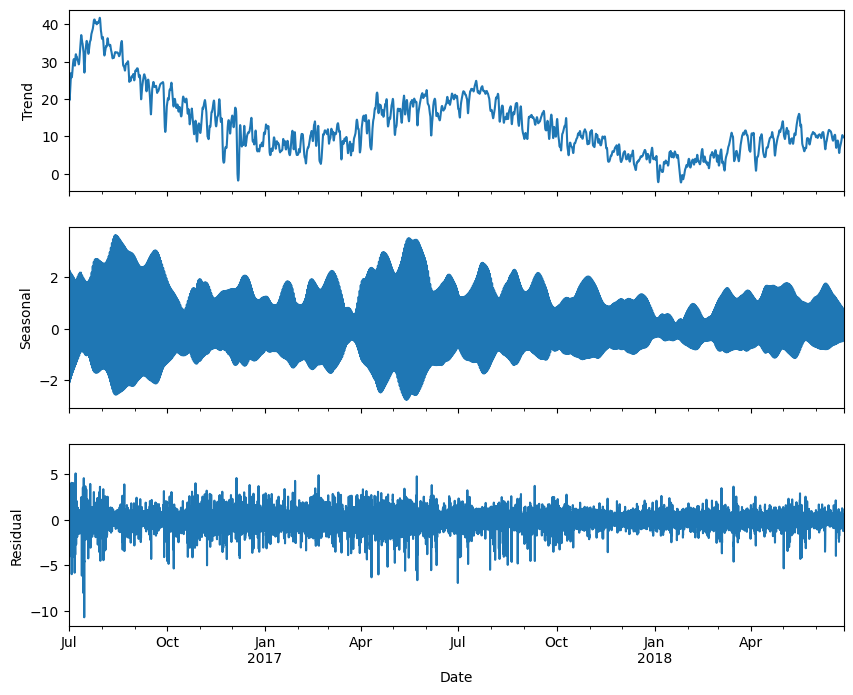

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# dateカラムをインデックスに設定
df.set_index('date', inplace=True)

# STL分解を実行
stl = STL(df['OT'], seasonal=23)  # 24時間の季節性を仮定
result = stl.fit()

# 分解結果をプロット
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
result.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')
result.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')
result.resid.plot(ax=ax3)
ax3.set_ylabel('Residual')
plt.xlabel('Date')
plt.show()

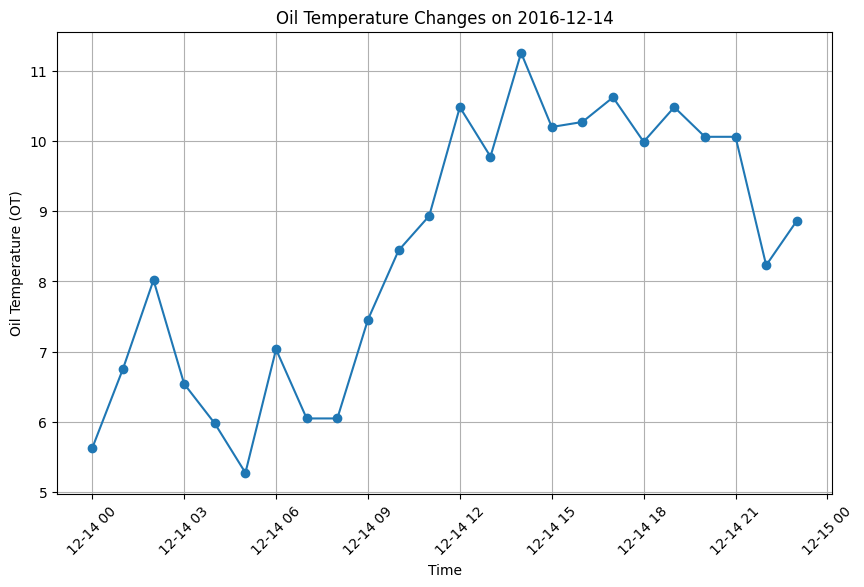

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 特定の日付を指定（例: 2016-07-01）
specific_date = '2016-12-14'

# 指定した日付のデータを抽出
daily_data = df[df['date'].dt.date == pd.to_datetime(specific_date).date()]

# 時間ごとのOTの変化をプロット
plt.figure(figsize=(10, 6))
plt.plot(daily_data['date'], daily_data['OT'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Oil Temperature (OT)')
plt.title(f'Oil Temperature Changes on {specific_date}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

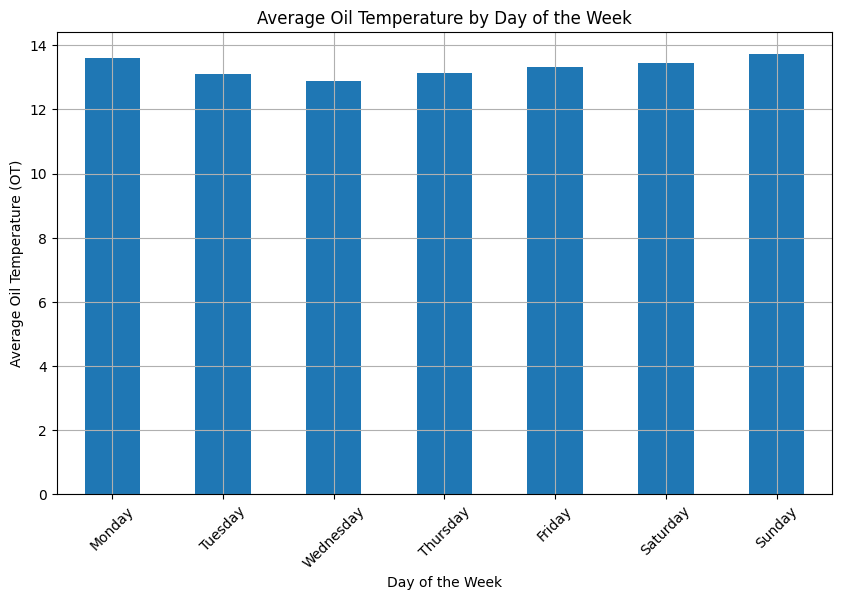

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 曜日を抽出（0: 月曜日, 1: 火曜日, ..., 6: 日曜日）
df['weekday'] = df['date'].dt.dayofweek

# 曜日ごとのOTの平均値を計算
weekday_avg = df.groupby('weekday')['OT'].mean()

# 曜日ごとのOTの変化をプロット
plt.figure(figsize=(10, 6))
weekday_avg.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Oil Temperature (OT)')
plt.title('Average Oil Temperature by Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.grid(True)
plt.show()

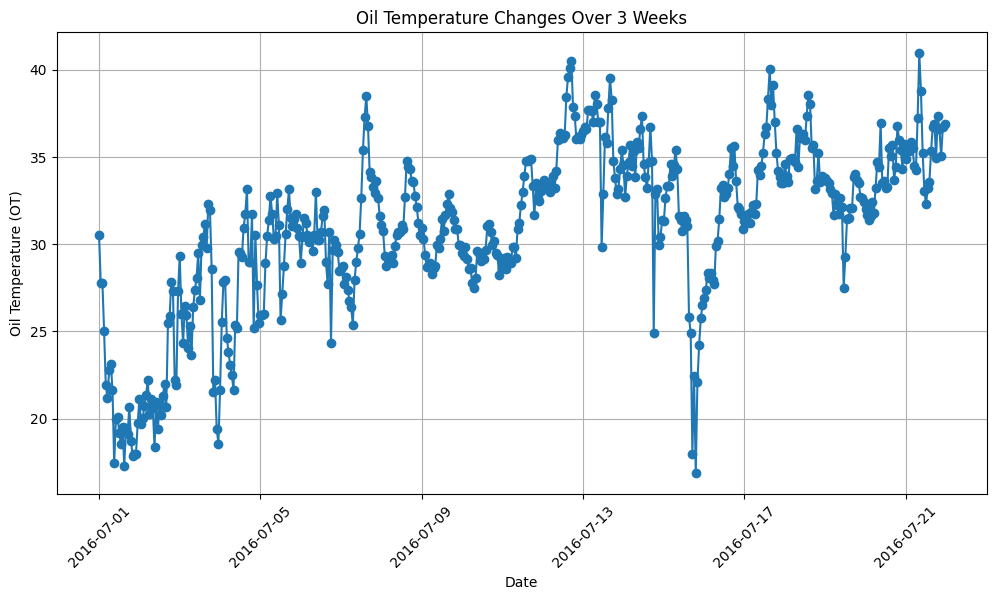

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 特定の開始日を指定（例: 2016-07-01）
start_date = '2016-07-01'

# 開始日から3週間後の日付を計算
end_date = pd.to_datetime(start_date) + pd.Timedelta(weeks=3)

# 指定した期間のデータを抽出
three_weeks_data = df[(df['date'] >= start_date) & (df['date'] < end_date)]

# 3週間分のOTの変化をプロット
plt.figure(figsize=(12, 6))
plt.plot(three_weeks_data['date'], three_weeks_data['OT'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Oil Temperature Changes Over 3 Weeks')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


C:\Users\masay\AppData\Local\Temp\ipykernel_16888\3861856605.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M', on='date')['OT'].mean()


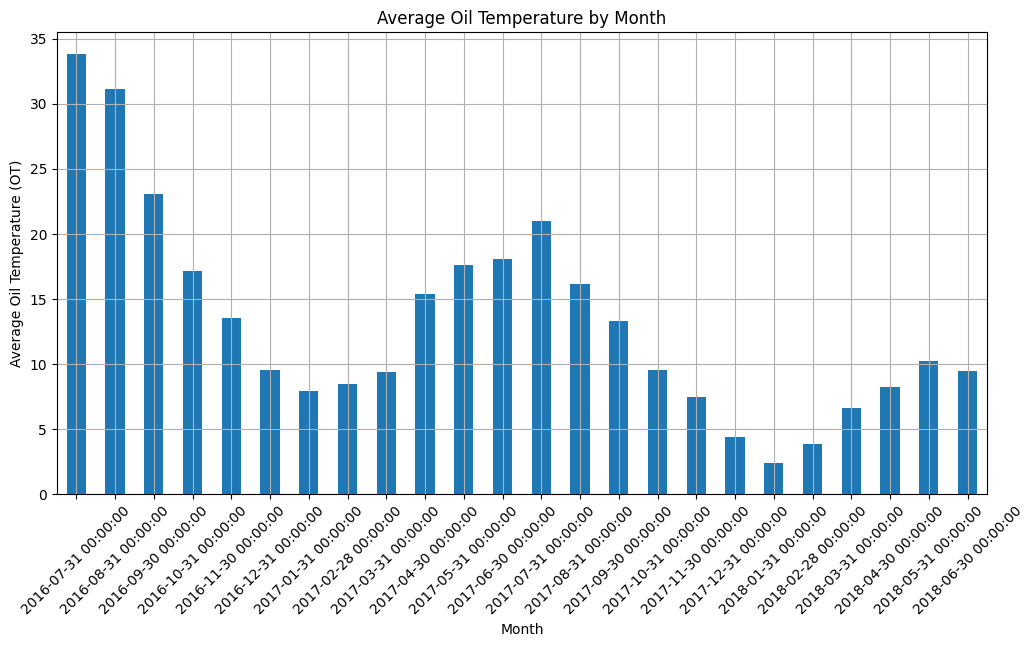

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 月ごとの平均温度を計算
monthly_avg = df.resample('M', on='date')['OT'].mean()

# 月ごとの平均温度をプロット
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Oil Temperature (OT)')
plt.title('Average Oil Temperature by Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

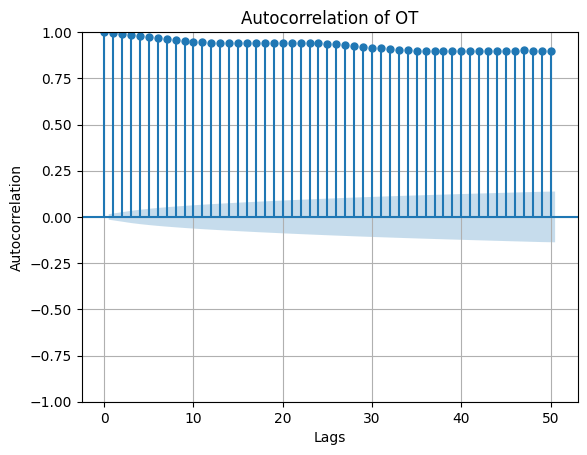

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# dateカラムをインデックスに設定
df.set_index('date', inplace=True)

# OTカラムの自己相関をプロット
plt.figure(figsize=(10, 6))
plot_acf(df['OT'], lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of OT')
plt.grid(True)
plt.show()

C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


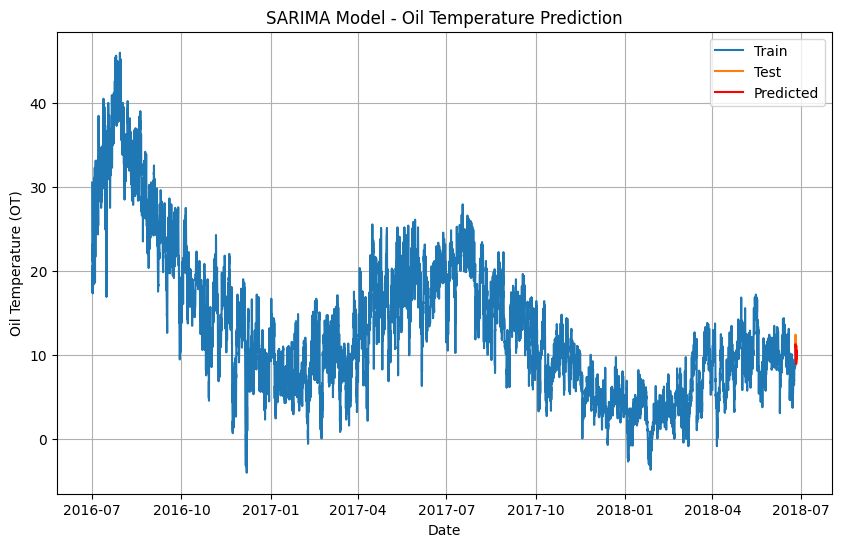

Mean Absolute Error: 0.35384512572913035


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# dateカラムをインデックスに設定
df.set_index('date', inplace=True)

# 訓練用データとテスト用データに分割（例: 最後の30日分をテスト用データとする）
train_data = df['OT'][:-30]
test_data = df['OT'][-30:]

# SARIMAモデルの定義とフィッティング
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit(disp=False)

# テストデータに対する予測
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# 予測結果と実際の値をプロット
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('SARIMA Model - Oil Temperature Prediction')
plt.legend()
plt.grid(True)
plt.show()

# 予測精度の評価（MAE）
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error: {mae}')

model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# dateカラムをインデックスに設定
df.set_index('date', inplace=True)

# 訓練用データとテスト用データに分割（例: 最後の30日分をテスト用データとする）
train_data = df['OT'][:-30]
test_data = df['OT'][-30:]

# パラメータの範囲を設定
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in pdq]

# 最適なパラメータを探索
best_aic = float("inf")
best_params = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train_data, order=param, seasonal_order=seasonal_param)
            model_fit = model.fit(disp=False)
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_params = (param, seasonal_param)
        except:
            continue

print(f'Best SARIMA parameters: {best_params}')

C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

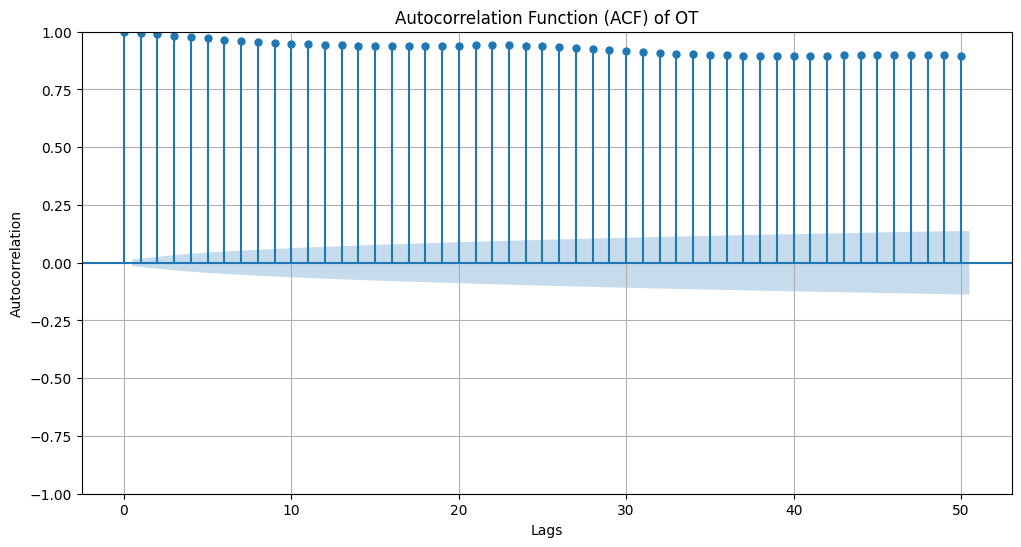

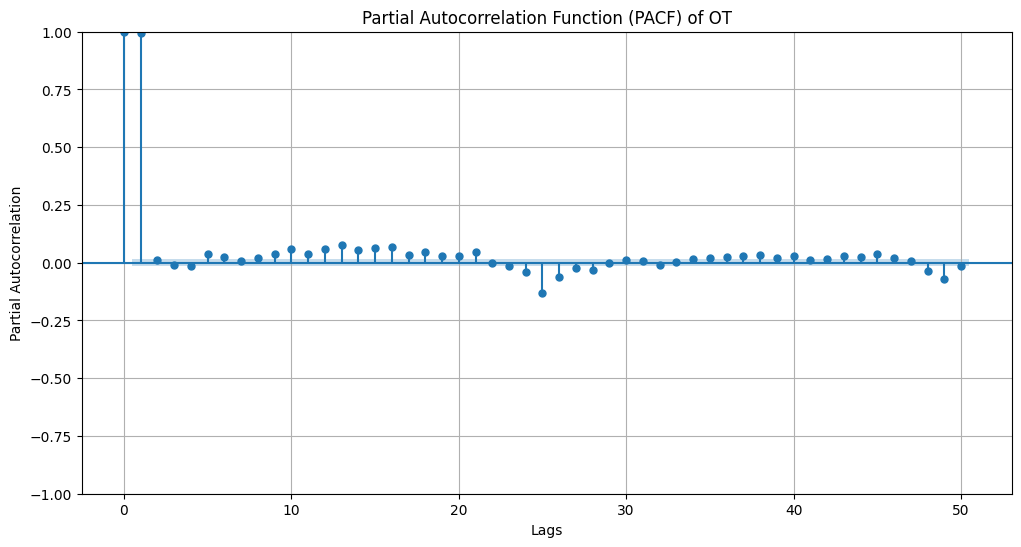

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# dateカラムをインデックスに設定
df.set_index('date', inplace=True)

# 自己相関関数（ACF）をプロット
plt.figure(figsize=(12, 6))
plot_acf(df['OT'], lags=50, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of OT')
plt.grid(True)
plt.show()

# 偏自己相関関数（PACF）をプロット
plt.figure(figsize=(12, 6))
plot_pacf(df['OT'], lags=50, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) of OT')
plt.grid(True)
plt.show()

C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


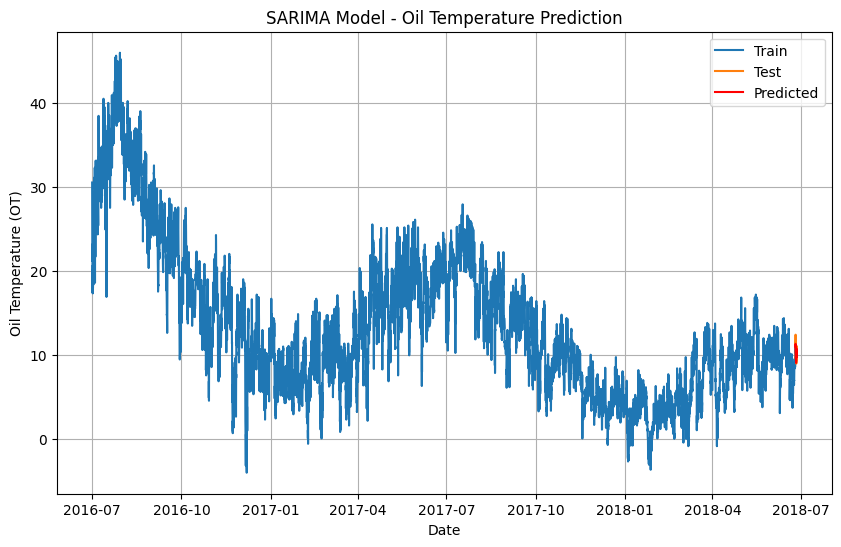

Mean Absolute Error: 0.33964008048719585


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# filtered_ett.csvファイルを読み込む
df = pd.read_csv('filtered_ett.csv')

# dateカラムをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# dateカラムをインデックスに設定
df.set_index('date', inplace=True)

# 訓練用データとテスト用データに分割（例: 最後の30日分をテスト用データとする）
train_data = df['OT'][:-30]
test_data = df['OT'][-30:]

# SARIMAモデルの定義とフィッティング
model = SARIMAX(train_data, order=(2, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit(disp=False)

# テストデータに対する予測
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# 予測結果と実際の値をプロット
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('SARIMA Model - Oil Temperature Prediction')
plt.legend()
plt.grid(True)
plt.show()

# 予測精度の評価（MAE）
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error: {mae}')

C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\masay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


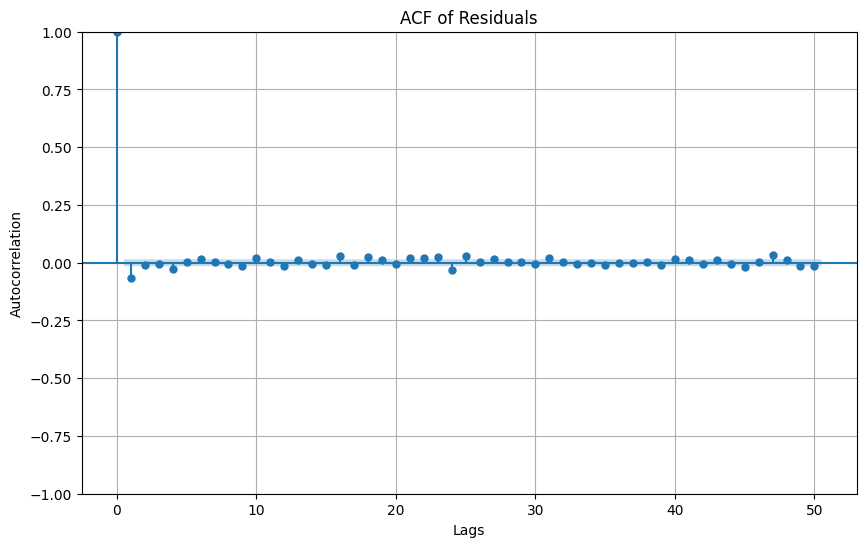

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

# データの読み込み
df = pd.read_csv('ett.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 訓練用データとテスト用データに分割
train_data = df['OT'][:-30]
test_data = df['OT'][-30:]

# SARIMAモデルの定義とフィッティング
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit(disp=False)

# 残差を取得
residuals = model_fit.resid

# 残差の自己相関関数（ACF）をプロット
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50, ax=plt.gca())
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('ACF of Residuals')
plt.grid(True)
plt.show()